In [1]:
import sys
import os
sys.path.append(os.path.abspath(".."))

In [2]:
from embedding_prediction_helpers import *

## Used Embeddings : DNALM
- sequence features
- lm_3utr_emb
- lm_5utr_emb
- protein embeddings


In [3]:
embeddings = pd.read_csv('../../../extracted_data/yeast_emb_embeddings_yeastnet.csv', sep=',', index_col=0)
embeddings = embeddings.set_index('gene_id')
embeddings

,gc_5_prime,gc_3_prime,gc_cds,AAA,AAC,AAG,AAT,ACA,ACC,ACG,...,yeastnet_118,yeastnet_119,yeastnet_120,yeastnet_121,yeastnet_122,yeastnet_123,yeastnet_124,yeastnet_125,yeastnet_126,yeastnet_127
gene_id,,,,,,,,,,,,,,,,,,,,,
YAL002W,0.365902,0.310000,0.372057,0.043956,0.019623,0.018053,0.039246,0.013344,0.007849,0.011774,...,-1.618205,-1.141898,-1.287498,1.853286,0.022138,0.629556,0.382991,0.245567,-0.103826,0.664300
YAL003W,0.372881,0.253333,0.448220,0.009709,0.024272,0.077670,0.004854,0.000000,0.019417,0.000000,...,-1.949698,-1.853423,2.331654,-1.290332,-0.702271,-0.449095,-0.111131,-2.751612,0.933591,2.433371
YAL004W,0.417747,0.346667,0.451163,0.023256,0.023256,0.000000,0.046512,0.004651,0.074419,0.013953,...,-1.618975,-1.249939,0.094645,0.448573,-1.155475,0.256036,0.117563,-0.439021,-0.194522,0.908419
YAL008W,0.381854,0.296667,0.388889,0.045455,0.020202,0.040404,0.050505,0.015152,0.005051,0.010101,...,-0.538675,-2.319680,-0.794552,1.598679,-2.007535,1.782250,0.555543,0.468474,0.187327,0.641010
YAL009W,0.368893,0.323333,0.414414,0.042471,0.011583,0.023166,0.027027,0.011583,0.007722,0.007722,...,-1.616556,-1.231609,0.289247,0.156369,-1.444753,-0.047846,0.626519,-0.833590,-0.345362,1.485873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YPR195C,0.334995,0.393333,0.467890,0.027523,0.000000,0.000000,0.027523,0.045872,0.009174,0.036697,...,-1.618975,-1.249939,0.094645,0.448573,-1.155475,0.256036,0.117563,-0.439021,-0.194522,0.908419
YPR197C,0.376869,0.276667,0.374332,0.058824,0.021390,0.021390,0.016043,0.042781,0.005348,0.005348,...,-1.618975,-1.249939,0.094645,0.448573,-1.155475,0.256036,0.117563,-0.439021,-0.194522,0.908419
YPR199C,0.329013,0.283333,0.391156,0.030612,0.020408,0.047619,0.047619,0.027211,0.003401,0.013605,...,-1.051243,-0.996177,-0.213304,1.686135,-0.479969,1.084192,0.068785,-0.592974,0.168737,0.167373


In [4]:
X, y = preprocess_data(embeddings, prediction_type='dmf')

## Linear Regression

Linear Regression
R2: -2.661
RMSE: 0.491


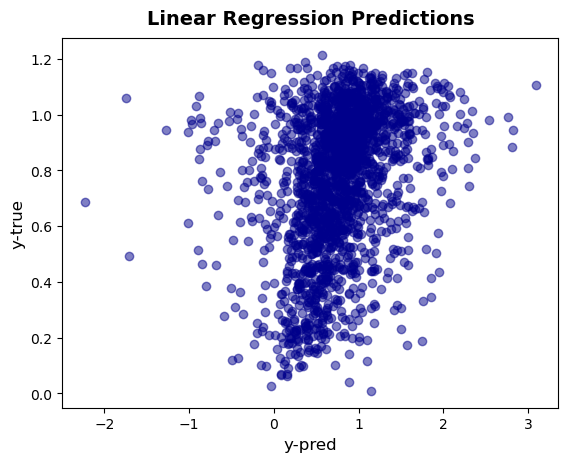

-2.660905146466018

In [5]:
run_Linear_Regression(X, y, "darkblue")

0.8293999163031952


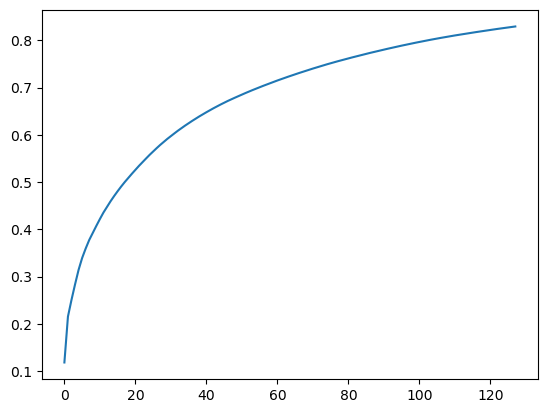

In [6]:
X_PCA = run_PCA(X)

## Linear Regression with PCA

Linear Regression
R2: 0.182
RMSE: 0.232


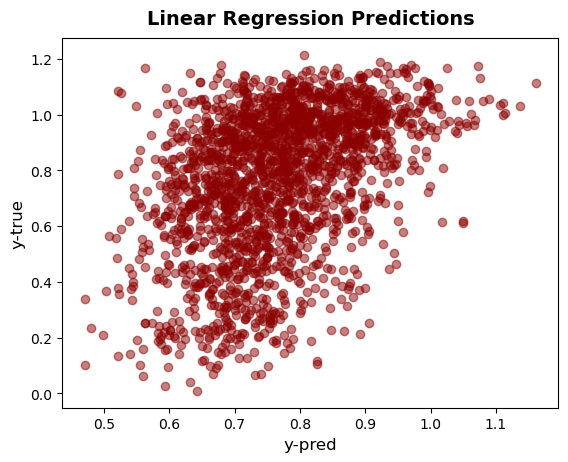

0.18150055171302726

In [7]:
run_Linear_Regression(X_PCA, y, "darkred")

## XGBoost

XGBoost Regression
R2: 0.382
RMSE: 0.202


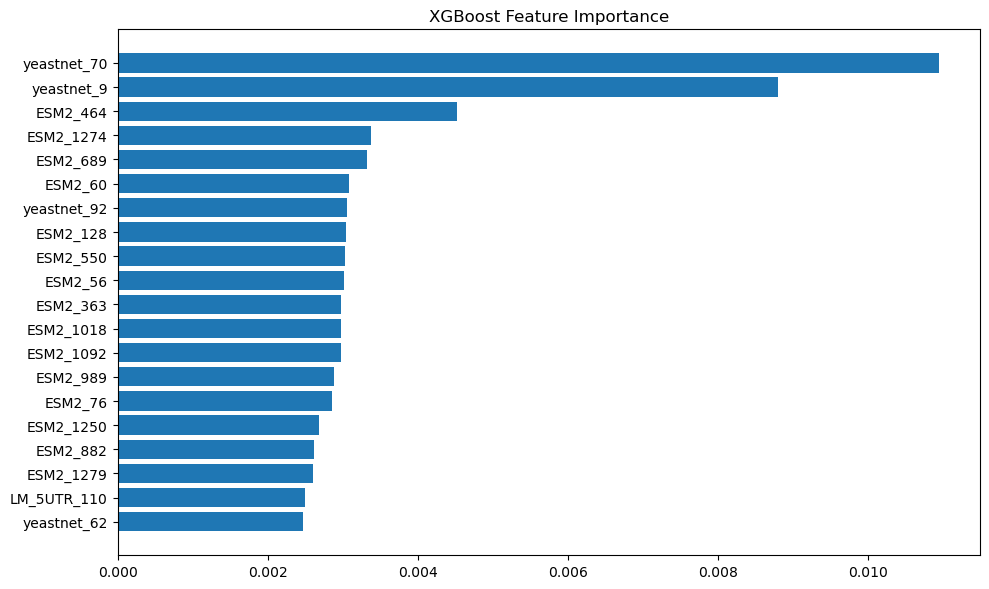

0.3817250037524591

In [8]:
run_XGBoost(X, y, embeddings)

## RandomForests

Random Forest Regression
R2: 0.252
RMSE: 0.222


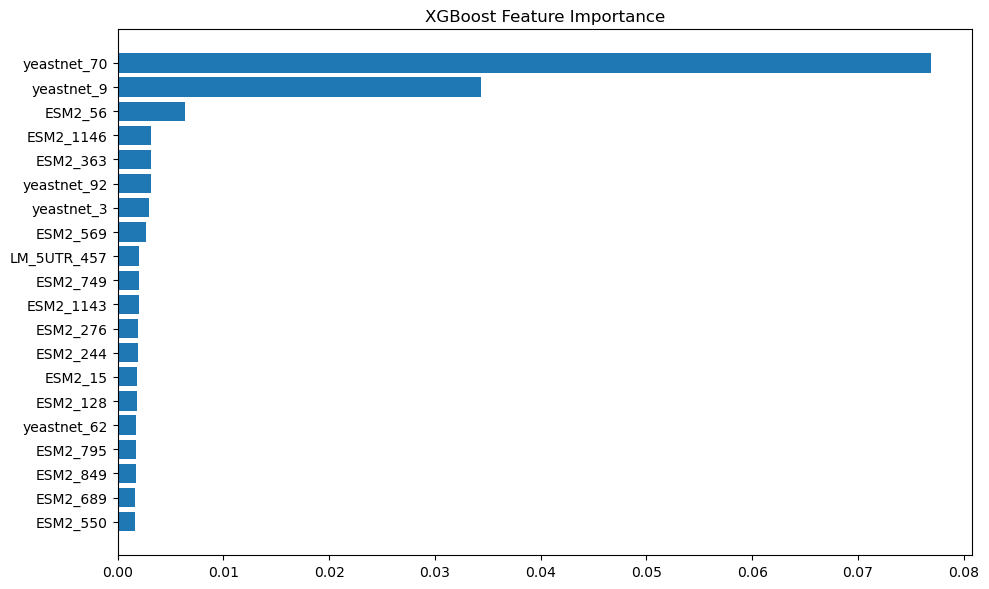

0.25225383273453694

In [9]:
run_Random_Forest(X, y, embeddings)